# Checkpoint 1 - Because we switched datasets

The new dataset we are using is going to be attached to this new submission of checkpoint 2. We are using a dataset of Electric vehicle population data. This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL). We decided to switch to this dataset because the other dataset was too big and it contained information that we weren't familiar with about the stock market. We can pull better conclusions from this dataset and we can create a more understandable tutorial with this dataset because the data is much easier to understand over stock market terms. To answer the question in Checkpoint 1 about why we chose the dataset,we chose this dataset because it has a lot of information about electric vehcicles and because they are growing in popularity. We thought this would be a good topic to explore because we have a wide variety of data points we can use as well as more information about electric vehicles that we are familioar with.

In [ ]:
import pandas as pd

# Project 2 CheckPoint - Aaryan, Sowmya

# Data Processing

# a) Import
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# b and c) parse, looked at the types and if the variables had the correct types (i.e numbers had int64, etc.)
# Looked through the data and also have already set up a dataframe (part c)
print("TYPES:")
print(df.dtypes)
print('------------------------------------------------------------------------------------------------------')
print("DATAFRAME:")
print(df.head)

TYPES:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract

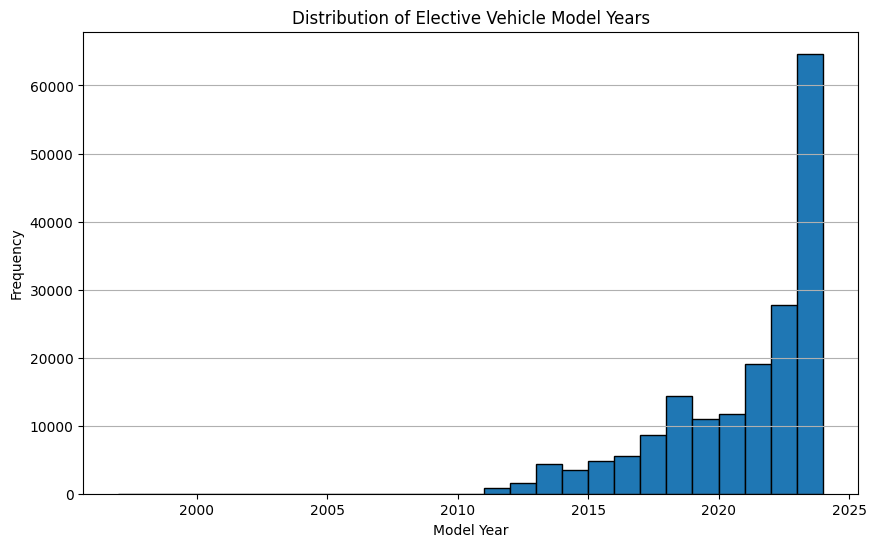

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
# Basic data exploration and summary statistics

# 1st Analysis: Descriptive statistics and distribution of
# electric vehicle model years
plt.figure(figsize = (10, 6))
plt.hist(df['Model Year'], bins = range(int(df['Model Year'].min()), int(df['Model Year'].max()) + 1), edgecolor = 'black')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Distribution of Elective Vehicle Model Years')
plt.grid(axis = 'y')
plt.show()

The distribution of electric vehicle models years in the dataset shows us a concentration of vehicles from very recent years. We can see that the dataset contains vehicles ranging from 1997 to 2024, but we can observe the significant increase in frequency for models from 2019 onwards, peaking around 2022. This shows us the rapidly growing adoption and availability of electric vehicles in recent years.

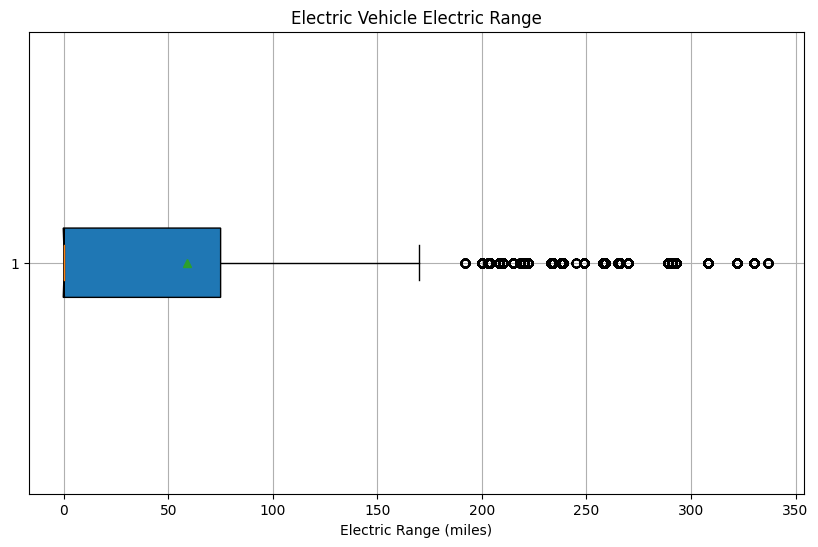

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
# Analysis 2: Electric Range Analysis and Outliers
plt.figure(figsize = (10, 6))
plt.boxplot(df['Electric Range'], vert=False, patch_artist=True, notch=True, showmeans=True)

plt.xlabel('Electric Range (miles)')
plt.title('Electric Vehicle Electric Range')
plt.grid(True)
plt.show()

The electric range of vehicles in the dataset shows significant variability, with a mean electric range of approx. 59 miles. This mean is misleading because of the high number of vehicles with an electric range of 0 miles. The max electric range we observed is 337 miles. We can see a lot of outliers in this graph. The significant number of outliers suggests a wide range in the capabilities of electric vehicles with some vehicles having exceptionally high electric ranges.

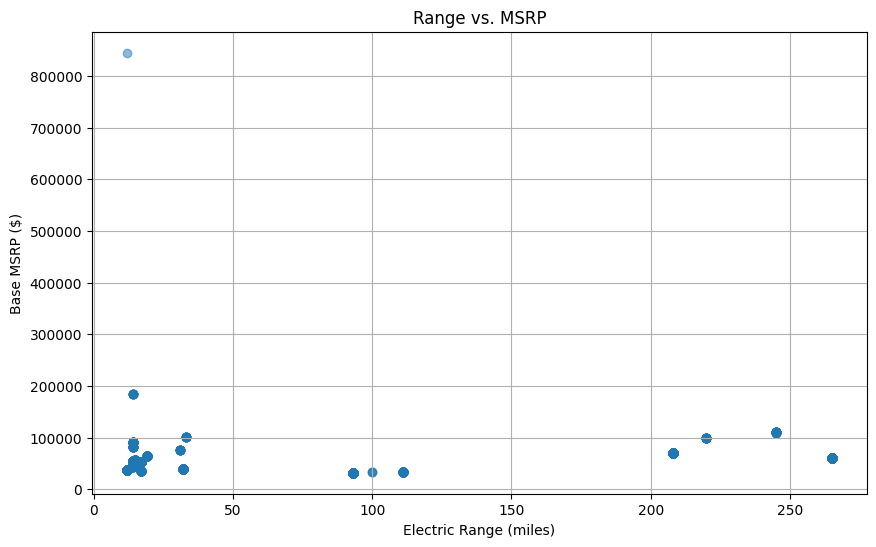

P-value:  6.043662101489954e-133
Correlation Coefficient:  0.40604251198933644


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
# Analysis 3: Correlation between electric range and base MSRP
# Using hypothesis testing

# First, we filter the meaningful data
filter = df[(df['Electric Range'] > 0) & (df['Base MSRP'] > 0)]

# Running the Pearson Correlation Test, and gaining a p-value from this
coefficient, p = stats.pearsonr(filter['Electric Range'], filter['Base MSRP'])

# Plotting
plt.figure(figsize = (10, 6))
plt.scatter(filter['Electric Range'], filter['Base MSRP'], alpha = 0.5)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.title('Range vs. MSRP')
plt.grid(True)
plt.show()

# Printing p-value
print('P-value: ', p)
print('Correlation Coefficient: ', coefficient)

Lets define our hypothesis': Our significance level is 0.05, We will be using the Pearson Correlation test

Null Hypothesis(H0): There is no correlation between electric range and base MSRP of electric vehicles. The correlation coeff. is 0.

Alternate Hypothesis(H1): There is a correlation between electric range and base MSRP of electic vehicles. The correlation coeff. is not 0.

Using the Pearson correlation test, we get a p-value of 6.043662101489954e-133 and a correlation coefficient of 0.40604251198933644.

Since the p-value is way less than the significane level of 0.05, we will reject the null hypothesis. So, There is a correlation between electric range and base MSRP of electric vehicles. The correlation coefficient is not 0.

This analysis strongly supports that there is a significant difference in base MSRP between vehicles with higher vs. lower electric ranges. There is also a positive correlation between electric range and base MSRP, which suggests that these two variables are related in a meaningful way where longer ranges means the vehicles are being priced higher.